In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron');
h1 {color:#3636ff; font-family:Orbitron; text-shadow:5px 5px 5px #aaa;}
a {color:#3636ff;}
div.output_area pre, div.output_area html {font-size:100%; color:#3636ff;}     
</style>

## For creating posts

 # Let's try to image uniformly distributed sequences
Jupyter Notebook & SageMath Kernel

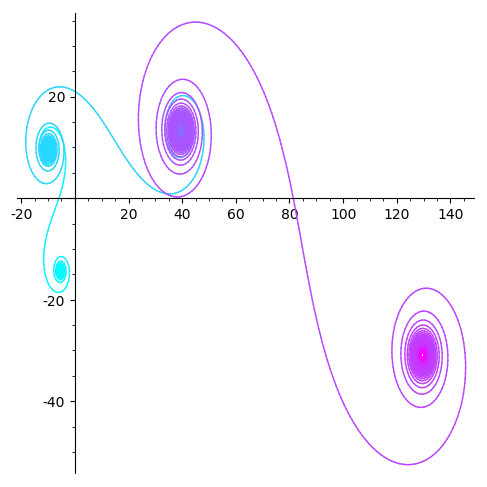

In [61]:
N = 10000; L = [CC(0,0)]; var('n'); 
c = [colormaps.cool((N^(-1)).n()*i)[:3] for i in [1..N]]
z = lambda n:exp(I*pi*n*ln(n/4)*2^0.5).n() 
for n in [1..N]: L.append(L[n-1]+CC(z(n))); 
sum([line([L[i],L[i+1]],color=c[i]) for i in [200..N-1]]).show(figsize=(5,5))

# If you want to improve this small and fun animation
Jupyter Notebook & SageMath Kernel

Animation with 25 frames
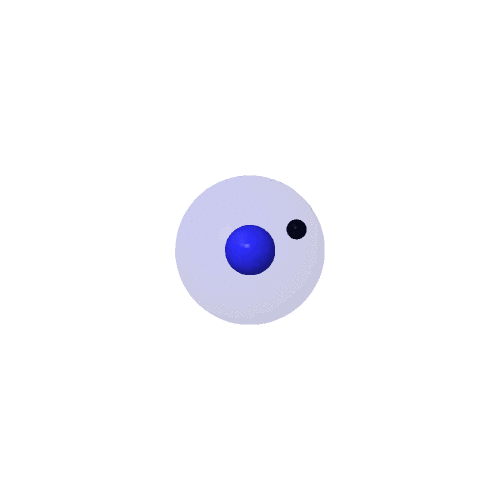

In [1]:
var('x,y,z'); from sage.plot.plot3d.shapes import Sphere
sphere12=Sphere(15,color='#3030ff',opacity=0.05).translate(0,0,0)+\
         Sphere(5,color='#3030ff').translate(0,0,0)
spheres=[sphere12+Sphere(2,color=(0.2*i,0,0.3*i))\
         .translate(0,13*cos(pi*i/12),7*sin(pi*i/12)) for i in [0..24]]
animate(spheres,frame=False)

# If you want to create a fun animation for functions
Jupyter Notebook & SageMath Kernel

Animation with 80 frames
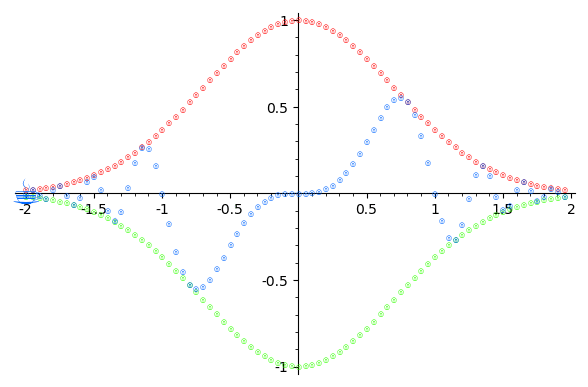

In [10]:
X=[x for x in srange(-2,2,0.05)]; Y=[exp(-x^2)*sin(pi*x^3) for x in X]; 
Y1,Y2=[exp(-x^2) for x in X],[-exp(-x^2) for x in X]
m,M='◎'.decode('utf-8'),'☕'.decode('utf-8'); c=[hue(0.3*i) for i in [0..2]]
t=sum([text(m,(x,y),fontsize=5,rgbcolor=c[i]) for i in [0..2] \
       for (x,y) in list(zip(X,[Y1,Y2,Y][i]))])
animate([t+text(M,(x,y),fontsize=25,rgbcolor=c[2]) for (x,y) in list(zip(X,Y))])

# When you want to imagine a "knot" curve
Jupyter Notebook & SageMath Kernel

In [62]:
@interact
def _(a=[10,15,20],b=[2,4,6],c=[15,10,5]):
    d=0.1; e=0.4; f=0.2; g=0.3; var('t')
    pretty_print('x = -%.1f*cos(%.1f*t)-%.1f*cos(%.1f*t)+%.1f*sin(%.1f*t))'%(a,d,b,e,c,f)) 
    pretty_print('y = -%.1f*cos(%.1f*t)+%.1f*sin(%.1f*t)-%.1f*sin(%.1f*t)'%(c,f,a,d,b,e))
    pretty_print('z = %.1f*cos(%.1f*t)'%(a,g))
    def L(i): return (-a*cos(d*i)-b*cos(e*i)+c*sin(f*i),-c*cos(f*i)+a*sin(d*i)-b*sin(e*i),a*cos(g*i))
    sum([line3d([L(i),L(i+1)],color=colormaps.winter(4*i)[:3],radius=.5) for i in [0..64]]).show(frame=False)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgxODczNTgyMzA+IHdpdGggMyB3aWRnZXRzCiAgYTogRHJvcGRvd24oZGVzY3JpcHRpb249dSdhJywgb3B0aW9ucz0oMTAsIDHigKY=


# Let's draw the sequence of complex numbers
Jupyter Notebook & SageMath Kernel

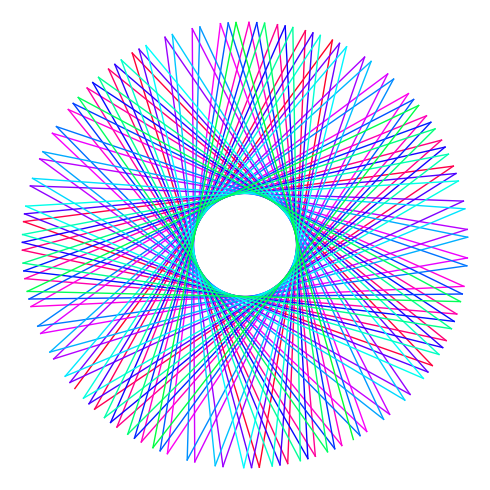

In [2]:
@interact
def _(N=(50,200,25)):
    L = [CC(0,0)]; var('n'); z = lambda n:exp(I*pi*n*2^0.2).n()
    c = [colormaps.hsv_r((200^(-1)).n()*i)[:3] for i in [1..200]]
    for n in [1..N]: L.append(L[n-1]+CC(z(n))); 
    sum([line([L[i],L[i+1]],color=c[i]) for i in [1..N-1]]).show(figsize=(5,5),axes=False)

# If you want to imagine a stereo signal
Jupyter Notebook & SageMath Kernel

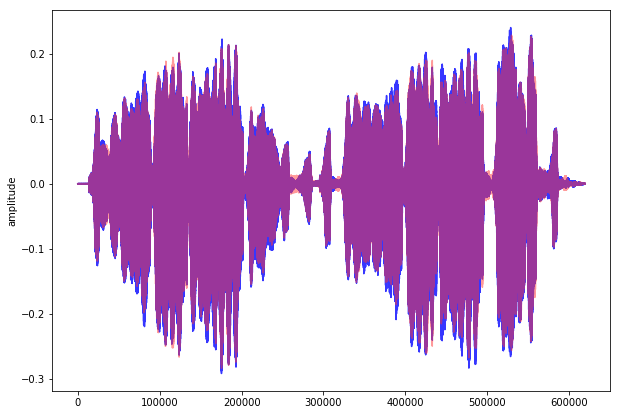

In [50]:
# https://ccrma.stanford.edu/~jos/wav/slideflute.wav
import numpy,pylab; from scipy.io import wavfile
fn = open('../OlgaBelitskaya/OlgaBelitskaya.github.io/slideflute.wav','r')
sr, wav = wavfile.read(fn); fn.close() 
wav = wav.astype('float')/numpy.iinfo(numpy.int16).max
f,ax = pylab.subplots(1,figsize=(10,7));
ax.plot(wav[:,1],c='#3636ff'); ax.plot(wav[:,0],c='#ff3636',alpha=0.5);
ax.set_ylabel('amplitude'); pylab.show()

In [ ]:
# online reading
import numpy,pylab; from scipy.io import wavfile; import urllib
input_file = urllib.urlopen('https://ccrma.stanford.edu/~jos/wav/slideflute.wav')
output_file = open('slideflute.wav','wb'); output_file.write(input_file.read())
output_file.close(); input_file.close()
sr, wav = wavfile.read('slideflute.wav');

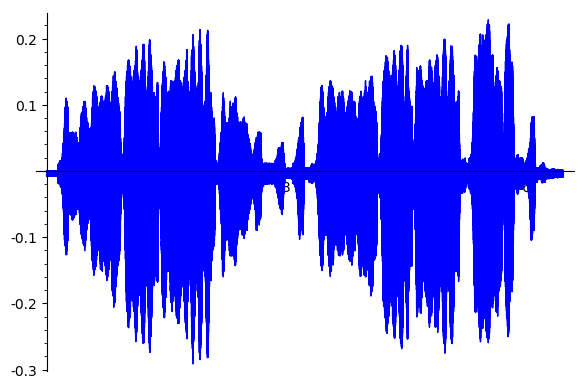

(48000, 2)

In [104]:
w=sage.media.wav.Wave('../OlgaBelitskaya/OlgaBelitskaya.github.io/slideflute.wav')
w.plot().show()
w.getframerate(), w.getnchannels()

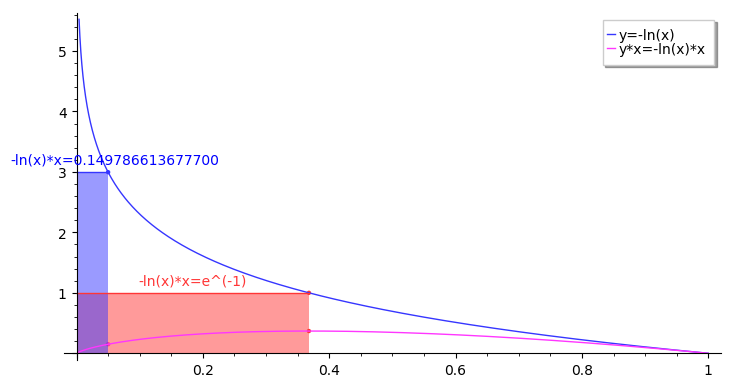

In [101]:
@interact
def _(t=slider(0.05,0.95,0.05,0.05)):
    def f(x): return -ln(x) 
    def g(x): return -ln(x)*x
    var('x'); x_max=solve((-ln(x)*x).diff(),x)[0].rhs()
    p=plot(f,(0,1),color='#3636ff',legend_label='y=-ln(x)')+\
    plot(g,(0,1),color='#ff36ff',legend_label='y*x=-ln(x)*x')
    pp=point((x_max,f(x_max)),color='#ff3636')+point((x_max,g(x_max)),color='#ff3636')
    a=plot(f(x_max),(0,x_max),fill='axis',color='#ff3636',fillcolor='#ff3636')
    an=text('-ln(x)*x='+str(g(x_max)),(x_max/2,f(x_max)+0.2),color='#ff3636')
    pt=point((t,f(t)),color='#3636ff')+point((t,g(t)),color='#ff36ff')
    at=plot(f(t),(0,t),fill='axis',color='#3636ff',fillcolor='#3636ff')
    ant=text('-ln(x)*x='+str(g(t).n()),(t+0.01,f(t)+0.2))
    (p+pp+a+an+pt+at+ant).show(figsize=(7,4))

In [ ]:
%%html
<style>
svg {background-color:slategray;}
text {fill:#fff; font-size:135%;} 
.point {stroke:#fff; stroke-width:1;}             
.grid line,.grid path {stroke:#fff; stroke-opacity:0.9; shape-rendering:crispEdges;}       
</style>
<script src="https://d3js.org/d3.v4.min.js"/>
<svg id="pp1"/><script>
var n = 255, m = 35, margin = {top:m,right:m,bottom:m,left:m},
    width = 500-margin.left-margin.right, height = 500-margin.top-margin.bottom; 
var xScale = d3.scaleLinear().domain([-1,1]).range([0,width]);
var yScale = d3.scaleLinear().domain([-1,1]).range([height,0]);
function make_x_gridlines() {return d3.axisBottom(xScale).ticks(11)};
function make_y_gridlines() {return d3.axisLeft(yScale).ticks(11)};
var pointColor = d3.scaleSequential().domain([0,n]).interpolator(d3.interpolateCool);            
var data = d3.range(0,n).map(function(i){return {"x":Math.sin(0.05*i),"y":Math.sin(0.125*i)}})
var svg = d3.select("#pp1")
            .attr("width",width+margin.left+margin.right)
            .attr("height",height+margin.top+margin.bottom)
            .append("g").attr("transform","translate("+margin.left+","+margin.top+")");
svg.append("g").attr("class","x axis").call(d3.axisBottom(xScale).tickSize(0.5))
               .attr("transform","translate(0,"+height+")"); 
svg.append("g").attr("class","y axis").call(d3.axisLeft(yScale).tickSize(0.5));    
svg.append("g").attr("class","grid").attr("transform","translate(0,"+height+")")
               .call(make_x_gridlines().tickSize(-height).tickFormat(""));
svg.append("g").attr("class","grid").call(make_y_gridlines().tickSize(-width).tickFormat(""));
svg.selectAll(".point").data(data).enter().append("circle").attr("class","point")
    .attr("fill",function(d,i){return pointColor(i)}).attr("r",4)
    .attr("cx",function(d) {return xScale(d.x)}).attr("cy",function(d) {return yScale(d.y)});
</script>

In [ ]:
%%html
<style>
svg {background-color:silver;}
text {fill:#fff; font-size:135%;} 
.line {fill:none; stroke:#3636ff; stroke-width:2;}             
.grid line,.grid path {stroke:#fff; stroke-opacity:0.9; shape-rendering:crispEdges;}       
</style>
<script src="https://d3js.org/d3.v4.min.js"/>
<svg id="pp2"/><script>
var n = 630, m = 35, margin = {top:m,right:m,bottom:m,left:m},
    width = 500-margin.left-margin.right, height = 500-margin.top-margin.bottom; 
var xScale = d3.scaleLinear().domain([-2,2]).range([0,width]);
var yScale = d3.scaleLinear().domain([-2,2]).range([height,0]);
function make_x_gridlines() {return d3.axisBottom(xScale).ticks(11)};
function make_y_gridlines() {return d3.axisLeft(yScale).ticks(11)};            
var data = d3.range(0,n).map(function(i){return {
    "x":Math.cos(0.01*i)+Math.cos(0.11*i)/2+Math.sin(0.3*i)/3,
    "y":Math.sin(0.01*i)+Math.sin(0.11*i)/2+Math.cos(0.3*i)/3}
    })
var lineColor = d3.scaleSequential().domain([0,n]).interpolator(d3.interpolateCool);                       
var svg = d3.select("#pp2")
            .attr("width",width+margin.left+margin.right)
            .attr("height",height+margin.top+margin.bottom)
            .append("g").attr("transform","translate("+margin.left+","+margin.top+")");
svg.append("g").attr("class","x axis").call(d3.axisBottom(xScale).tickSize(0.5))
               .attr("transform","translate(0,"+height+")"); 
svg.append("g").attr("class","y axis").call(d3.axisLeft(yScale).tickSize(0.5));    
svg.append("g").attr("class","grid").attr("transform","translate(0,"+height+")")
               .call(make_x_gridlines().tickSize(-height).tickFormat(""));
svg.append("g").attr("class","grid").call(make_y_gridlines().tickSize(-width).tickFormat(""));
var line = d3.line().curve(d3.curveMonotoneX)
             .x(function(d) {return xScale(d.x);}).y(function(d) {return yScale(d.y);});
svg.append("path").datum(data).attr("class","line").attr("d",line);
</script>

In [ ]:
import numpy,pylab,time; from sklearn import manifold,datasets
digits = datasets.load_digits(n_class=10); X,y = digits.data,digits.target
tsne = manifold.TSNE(n_components=2,init='pca',random_state=0)
t0 = time.time(); X_tsne = tsne.fit_transform(X)
x_min,x_max = numpy.min(X_tsne,0),numpy.max(X_tsne,0); X_tsne = (X_tsne-x_min)/(x_max-x_min)
f,ax = pylab.subplot(1,figsize=(7,7)); pylab.xticks([]); pylab.yticks([])
pylab.title("t-SNE embedding of the digits (time %.2fs)"%(time.time()-t0))
for i in range(X_tsne.shape[0]):
    pylab.text(X_tsne[i,0],X_tsne[i,1],str(y[i]),color=pylab.cm.Set1(y[i]/10.),
               fontdict={'weight':'bold','size': 9})

y == k^2*x^2 + k^2*x - 3*sqrt(3)*k*x + k^2 - 12*x^2 - sqrt(3)*k + 6*x - 6

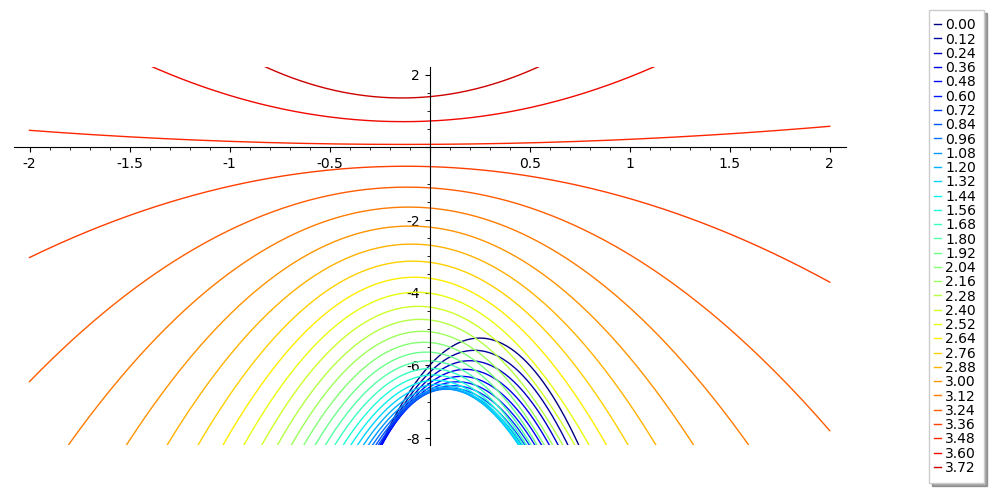

In [118]:
var('k,x,y'); pretty_print(y==x^2*k^2-12*x^2+k^2*x-3*sqrt(3)*k*x+6*x+k^2-sqrt(3)*k-6)
c=[colormaps.jet(0.03*i)[:3] for i in [0..31]]; k=[0.12*i for i in [0..31]]
p=sum([plot(x^2*k[i]^2-12*x^2+k[i]^2*x-3^1.5*k[i]*x+6*x+k[i]^2-3^0.5*k[i]-6,(x,-2,2),color=c[i],
            legend_label='%.2f'%k[i]) for i in [0..31]])
p.set_legend_options(loc=(1.1,-0.1)); p.show(ymin=-8,ymax=2,figsize=(10,5))

## Additional material

In [ ]:
%%r
library('grDevices'); library('MASS'); library('nnet'); data(Boston); n <- dim(Boston)[1];
svg(filename="Rplots.svg",width=10,height=5,pointsize=12,onefile=T,
      family="sans",bg="white",antialias=c("default","none","gray","subpixel"))
model <- nnet(as.matrix(Boston[1:430,-14]),as.matrix(Boston[1:430,14]),size=64,maxit=1000,linout=T,decay=0.01)
predictions <- predict(model,as.matrix(Boston[431:n,-14]),type="raw")
plot(as.matrix(Boston[431:n,14]),col="#3636ff",type="o",ylab='targets & predictions',yaxt="n");  
par(new=TRUE); plot(predictions,col="#ff3636",type="o",cex=1.3,ylab='targets & predictions'); dev.off()

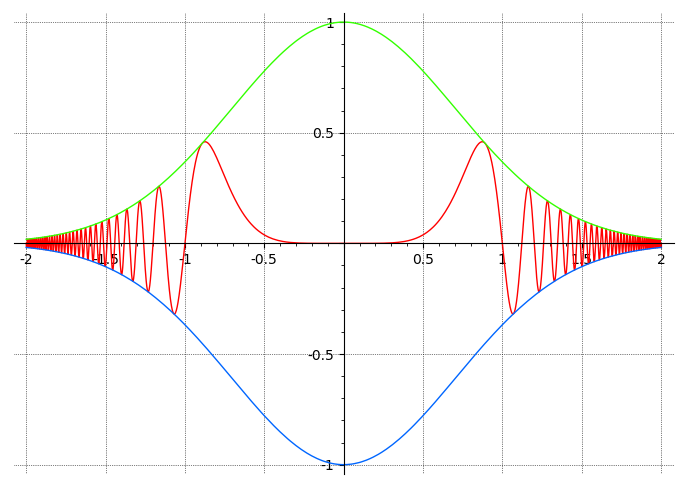

In [103]:
@interact
def _(n=(1,11,1)):
    var('x'); f=[exp(-x^2)*sin(pi*x^n),exp(-x^2),-exp(-x^2)]
    sum([plot(f[i],(-2,2),color=hue(0.3*i),gridlines=True) for i in [0..2]]).show(figsize=(7,5))